# Z-test, t-test 검정

- Z-test, t-test 검정 테스트의 전제 조건

    - 데이터가 양적변수
    - 데이터가 정규화 되어야 함
    - 데이터가 등분산성 만족해야 함

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [17]:
# 필요한 패키지 설치

from scipy.stats import shapiro
from statsmodels.stats.weightstats import ztest as ztest
import scipy.stats
from scipy import stats
from scipy.stats import ttest_rel, ttest_ind
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

plt.rcParams['figure.dpi'] = 150

In [3]:
# 데이터 불러오기
# https://www.kaggle.com/datasets/sewonghwang/golf-ball-testing
# df = pd.read_csv("../resource/W4/Golf_test.csv") # MS Windows 용 코드 (각자 PC 위치에 맞게 수정하시오)
df = pd.read_csv("/content/drive/MyDrive/DA2025_W4/Golf_test.csv") # Colab 용 코드 (각자 Google drive 위치에 맞게 수정하시오)

# 데이터 샘플 확인
df.head()

,TypeA_before,TypeA_after,TypeB_before,TypeB_after,TypeC_before,TypeC_after
0,277,264,265,268,267,268
1,269,261,264,267,264,269
2,263,267,269,272,283,283
3,266,272,274,277,287,266
4,262,258,261,264,275,266


In [4]:
# 골프공 타입 별 통계값 확인

df.describe()

,TypeA_before,TypeA_after,TypeB_before,TypeB_after,TypeC_before,TypeC_after
count,50.000000,50.000000,50.000000,50.000000,50.000000,50.000000
mean,268.460000,270.720000,273.600000,276.100000,270.360000,271.040000
std,9.817124,8.487782,8.566665,8.493094,8.385507,9.437139
min,250.000000,255.000000,258.000000,261.000000,255.000000,253.000000
25%,262.000000,264.000000,266.250000,269.000000,263.250000,265.000000
50%,266.000000,271.000000,273.500000,276.500000,268.500000,268.000000
75%,275.750000,275.000000,278.000000,280.000000,275.750000,277.750000
max,289.000000,289.000000,292.000000,295.000000,289.000000,291.000000


In [5]:
df2 =  pd.melt(df)
df2

,variable,value
0,TypeA_before,277
1,TypeA_before,269
2,TypeA_before,263
3,TypeA_before,266
4,TypeA_before,262
...,...,...
295,TypeC_after,266
296,TypeC_after,257
297,TypeC_after,291
298,TypeC_after,267


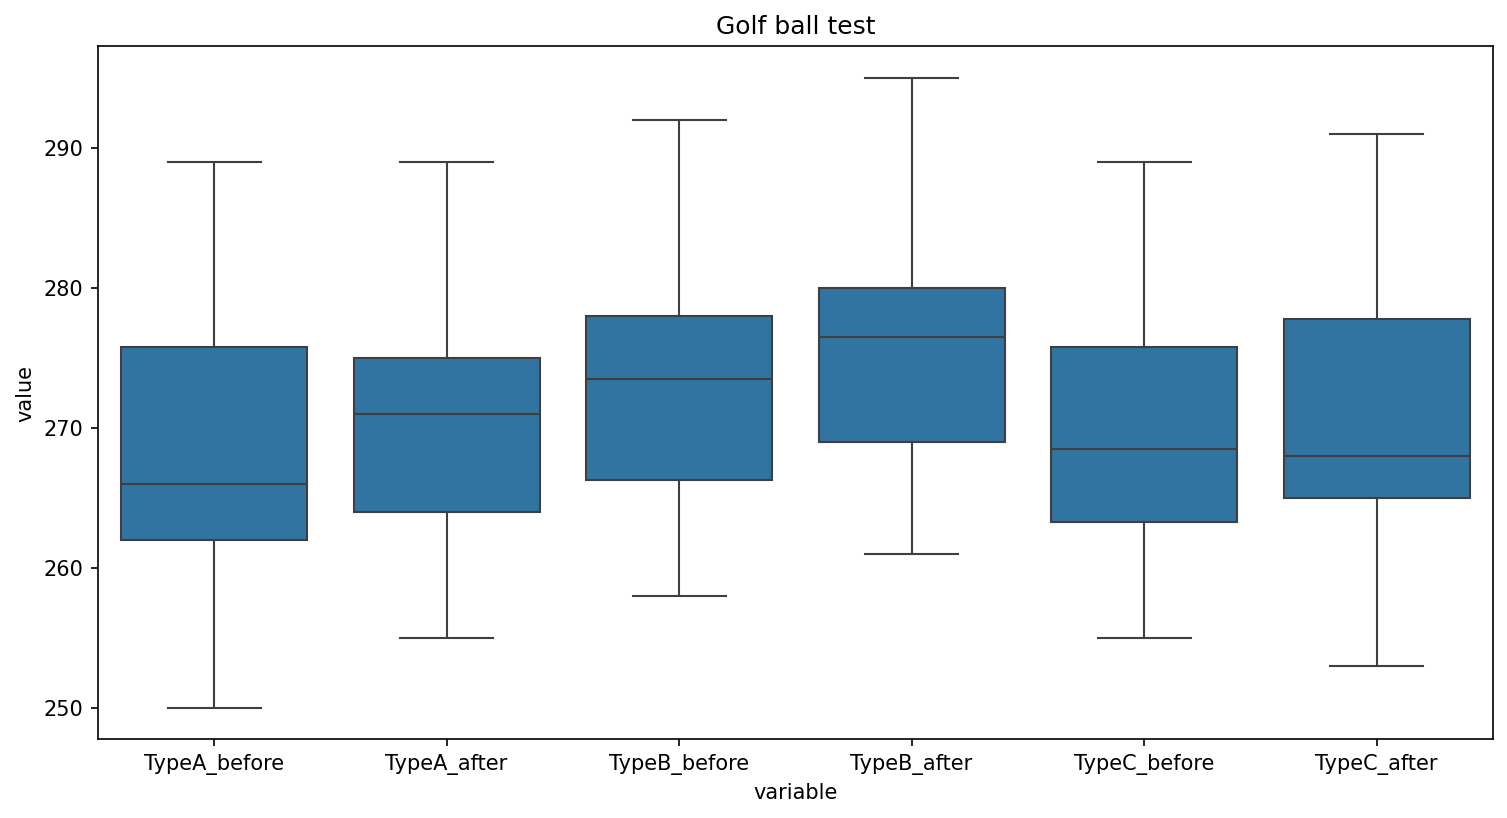

In [6]:
# 그룹 별 박스 플롯 시각화
plt.figure(figsize=(12,6))
sns.boxplot(x='variable', y='value', data=df2)
plt.title('Golf ball test')
plt.show()

## 데이터 정규성 검정

### - 데이터 정규성 검정: shapiro()

In [7]:
# 데이터 정규성 검정

print(shapiro(df['TypeA_before']))
print(shapiro(df['TypeA_after']))
print(shapiro(df['TypeB_before']))
print(shapiro(df['TypeB_after']))
print(shapiro(df['TypeC_before']))
print(shapiro(df['TypeC_after']))

ShapiroResult(statistic=np.float64(0.9655377158052212), pvalue=np.float64(0.15154941346876938))
ShapiroResult(statistic=np.float64(0.9728279567361319), pvalue=np.float64(0.30051020169283893))
ShapiroResult(statistic=np.float64(0.9730037974106026), pvalue=np.float64(0.305345354286895))
ShapiroResult(statistic=np.float64(0.9693011028933032), pvalue=np.float64(0.2167560294629035))
ShapiroResult(statistic=np.float64(0.9595516780117022), pvalue=np.float64(0.08512947305030288))
ShapiroResult(statistic=np.float64(0.946983211173158), pvalue=np.float64(0.025681947801527313))


#### - 데이터 정규성에 대한 결과 검토

- TpyeC_after 외의 모든 p-value가 유의수준 0.05 보다 큼

  => 변수 값이 정규성에서 벗어나지 않는다는 귀무가설 채택
  
  => 해당 데이터는 정규성을 가짐

- 정규성을 가지지 못하는 데이터는 정규성을 가질 수 있도록 데이터 변환 필요: 이상치 처리, 스케일링 등

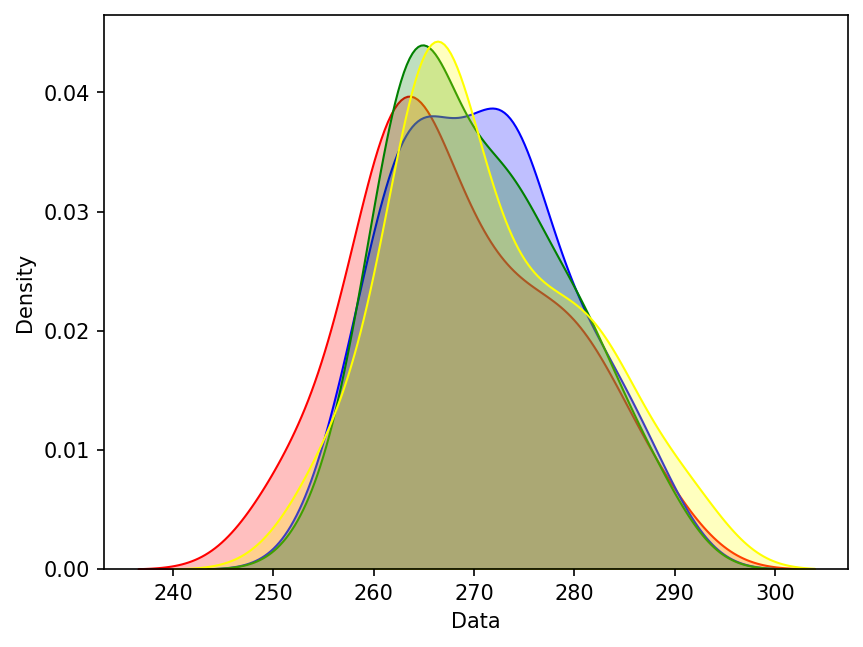

In [8]:
import matplotlib
import seaborn as sns

# plt.hist(x=df['TypeA_before'], bins= 20)
# plt.hist(x=df['TypeA_after'], bins= 20)
# plt.hist(x=df['TypeC_after'], bins= 20)

sns.kdeplot(data=df['TypeA_before'], fill=True, color='red')
sns.kdeplot(data=df['TypeA_after'], fill=True, color='blue')
sns.kdeplot(data=df['TypeC_before'], fill=True, color='green')
sns.kdeplot(data=df['TypeC_after'], fill=True, color='yellow')

plt.xlabel("Data")
plt.show()

## 데이터 등분산성 검정



### - bartlett 등분산성 검정 방법

- 두 집단 이상의 등분산성 검정
- 정규분포 따를 때 사용

In [9]:
# 정규분포 데이터 등분산성 검정
stats.bartlett(df['TypeA_before'],df['TypeA_after'],
               df['TypeB_before'],df['TypeB_after'],
               df['TypeC_before'],df['TypeC_after'])

BartlettResult(statistic=np.float64(2.232358764161634), pvalue=np.float64(0.8161484218330712))

#### - bartlett 검정 결과 검토

- p-value가 유의수준 0.05 보다 큼

  => 데이터들이 상호간에 분산 차이가 없다는 귀무가설 채택
  
  => 등분산성을 만족하고 있다.

### - Levene 등분산성 검정

- 두 집단 이상의 등분산성 검정
- 정규분포 따르지 않을 때 사용

In [10]:
# 비정규분포 데이터 등분산성 검정
stats.levene(df['TypeA_before'],df['TypeA_after'],
               df['TypeB_before'],df['TypeB_after'],
               df['TypeC_before'],df['TypeC_after'])

LeveneResult(statistic=np.float64(0.3006654380902731), pvalue=np.float64(0.9122456830293507))

#### - Levene 검정 결과 검토

- p-value가 유의수준 0.05 보다 큼 ==> 데이터들이 상호간에 분산 차이가 없다는 귀무가설 채택 ==> 등분산성을 만족하고 있다.

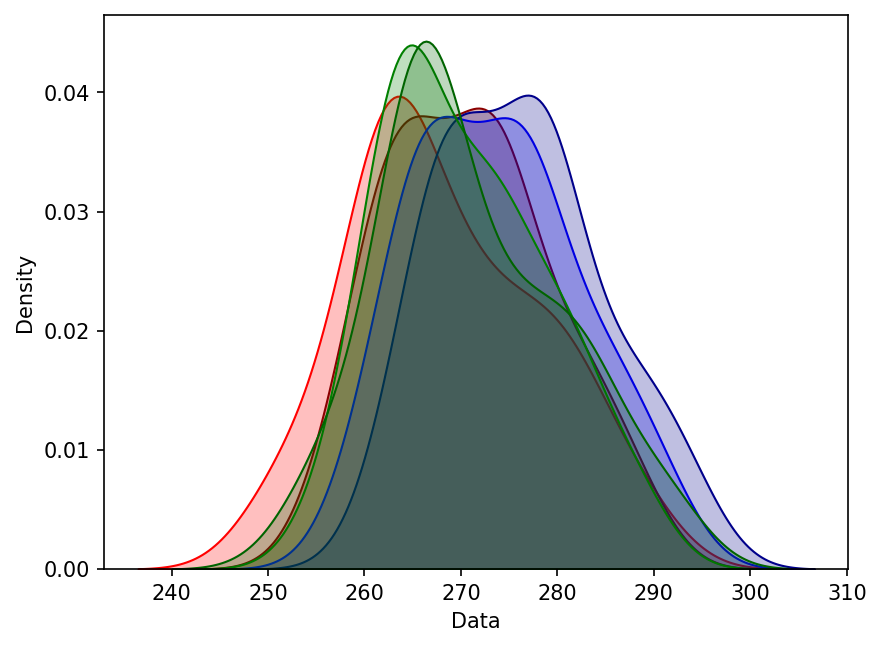

In [11]:
sns.kdeplot(df['TypeA_before'], color='red', fill=True)
sns.kdeplot(df['TypeA_after'], color='darkred', fill=True)
sns.kdeplot(df['TypeB_before'], color='blue', fill=True)
sns.kdeplot(df['TypeB_after'], color='darkblue', fill=True)
sns.kdeplot(df['TypeC_before'], color='green', fill=True)
sns.kdeplot(df['TypeC_after'], color='darkgreen', fill=True)
plt.xlabel("Data")
plt.show()

## Z-test 검정

### - Type A 처리 전과 후의 유의성 테스트를 위한 Z-test 검정

In [12]:
# Z-test (TypeA_Before와 TypeA_After)
ztest(df['TypeA_before'], x2=df['TypeA_after'], value=0, alternative='two-sided')

(np.float64(-1.2313987682249838), np.float64(0.21817375744980994))

#### - 처리 전후 유의성 Z-test 결과에 대한 검토(Type A의 효과 유무)
- 결과:

  z-통계량: -1.2313...

  p-value: 0.2181...

- p-value가 양측 검정 유의수준 0.025 보다 큼

  => 골프공에 대해서 Type A 처리 전과 처리 후의 비거리 차이가 없다는 귀무가설 채택
  
  => Type A 처리 효과가 없음.

### - 양측검정, 단측검정(왼꼬리 검정), 단측검정(오른꼬리 검정)

- 비교 대상: TypeA와 TypeB 처리 전 비거리

- 양측검정: TypeA와 TpyeB 처리전의 골프공 드라이버 비거리 차이가 있나?

- 단측검정(왼꼬리 검정): TypeA 처리전의 골프공 드라이브 비거리가 TypeB 처리전의 비거리보다 작으냐?

- 단측검정(오른꼬리 검정): TypeA 처리전의 골프공 드라이브 비거리가 TypeB 처리전의 비거리보다 크냐?

In [13]:
# Z-test (TypeA_Before와 TypeB_before)

# 양측검정
print(ztest(df['TypeA_before'], x2=df['TypeB_before'], value=0, alternative='two-sided'))

# 단측검정(왼꼬리검정)
print(ztest(df['TypeA_before'], x2=df['TypeB_before'], value=0, alternative='smaller'))

# 단측검정(오른꼬리검정)
print(ztest(df['TypeA_before'], x2=df['TypeB_before'], value=0, alternative='larger'))

(np.float64(-2.789495974658115), np.float64(0.005279015267745852))
(np.float64(-2.789495974658115), np.float64(0.002639507633872926))
(np.float64(-2.789495974658115), np.float64(0.9973604923661271))


#### - 양측, 단측 Z-test 검정 결과 검토

- 양측검정: p-value가 양측검증 유의수준 0.05의 비교 기준인 0.025 보다 작음 ==> 차이가 없다는 귀무가설 기각 ==> 비거리 차이가 있음

- 단측검정(왼꼬리 검정): p-value가 단측검정 비교 기준인 0.05 보다 작음 ==> 거리가 작지 않다는 귀무가설 기각 ==> TypeA의 비거리가 작음

- 단측검정(오른꼬리 검정): p-value가 단측검정 비교 기준인 0.05보다 큼 ==> 거리가 크지 않다는 귀무가설 채택 ==> TypeA의 비거리가 크지 않음

## t-test 검정

### - 대응표본 t-test검정: A 처리 전과 처리 후

- 대응표본이란

    - 두 집단의 자료를 쌍으로 묶을 수 있을 때: 예) 남편과 아내, 쌍둥이, before & after
    - 두 집단의 자료가 쌍이기에 두 집단의 자료의 갯수가 동일

- 대응표본 t-test

    - 쌍을 이루고 있는 두 값의 차이 구함
    - 귀무가설: 모집단에서 차이의 평균은 0  


In [18]:
# 대응표본 t검정 수행
# scipy.stats.ttest_rel(df['TypeA_before'],df['TypeA_after'])
ttest_rel(df['TypeA_before'],df['TypeA_after'])

TtestResult(statistic=np.float64(-1.221439914972903), pvalue=np.float64(0.227763764486876), df=np.int64(49))

#### - 대응표본 t-test 검정 결과 검토

- p-value가 유의수준 0.05의 비교 값 0.025 보다 큼 ==> TypeA 처리 전후에 거리 차이가 없다는 귀무가설 채택 ==> 비거리 차이가 없음





#### - 독립표본 t-test 검정: A처리 전과 B처리전

- 독립표본이란?

    - 두 표본집단을 구성할 때 독립으로 뽑을 경우
    - 비교
        - 독립표본의 경우: 무작위로 남자 100명과 여자 100명을 뽑아 두 집단을 비교할 경우
        - 대응표본의 경우: 부부 100상을 뽑아 남편 100명과 아내 100명의 두 집단을 비교할 경우

ttest_ind() 사용 설명

- 입력 파라미터

  - equal_var: 입력되는 두 집단의 분산이 같다고 할 경우 True (Student's t-test), 두 집단의 분산이 다르다고 할 경우 False (Welch's t-test)

- 출력 값

  - t_stat: 차이의 정도

  - p_value

  - df: 자유도(degree of freedom)

In [15]:
# 독립표본 t검정 수행
ttest_ind(df['TypeA_before'],df['TypeB_before'], equal_var=False)

TtestResult(statistic=np.float64(-2.789495974658115), pvalue=np.float64(0.0063642243501398285), df=np.float64(96.23536968302767))

#### - 독립표본 t-test 결과 검토

- p-value가 유의수준 0.05의 양측검정 비교값 0.025보다 작음 ==> TypeA와 TypeB 처리 전 거리는 같다는 귀무가설 기각 ==> 유의미한 비거리 차이가 있음

